In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/Classified Data (1).txt')


In [ ]:
df.head()

Unnamed: 0       WTT       PTI       EQW       SBI       LQE       QWG  \
0           0  0.913917  1.162073  0.567946  0.755464  0.780862  0.352608   
1           1  0.635632  1.003722  0.535342  0.825645  0.924109  0.648450   
2           2  0.721360  1.201493  0.921990  0.855595  1.526629  0.720781   
3           3  1.234204  1.386726  0.653046  0.825624  1.142504  0.875128   
4           4  1.279491  0.949750  0.627280  0.668976  1.232537  0.703727   

        FDJ       PJF       HQE       NXJ  TARGET CLASS  
0  0.759697  0.643798  0.879422  1.231409             1  
1  0.675334  1.013546  0.621552  1.492702             0  
2  1.626351  1.154483  0.957877  1.285597             0  
3  1.409708  1.380003  1.522692  1.153093             1  
4  1.115596  0.646691  1.463812  1.419167             1

In [ ]:
#standardize the variable
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [ ]:
StandardScaler(copy=True,with_mean=True,with_std=True)

StandardScaler()

In [ ]:
scaled_features=scaler.transform(df.drop('TARGET CLASS',axis=1))

In [ ]:
df_feat.head()

Unnamed: 0       WTT       PTI       EQW       SBI       LQE       QWG  \
0   -1.730320 -0.123542  0.185907 -0.913431  0.319629 -1.033637 -2.308375   
1   -1.726856 -1.084836 -0.430348 -1.025313  0.625388 -0.444847 -1.152706   
2   -1.723391 -0.788702  0.339318  0.301511  0.755873  2.031693 -0.870156   
3   -1.719927  0.982841  1.060193 -0.621399  0.625299  0.452820 -0.267220   
4   -1.716463  1.139275 -0.640392 -0.709819 -0.057175  0.822886 -0.936773   

        FDJ       PJF       HQE       NXJ  
0 -0.798951 -1.482368 -0.949719 -0.643314  
1 -1.129797 -0.202240 -1.828051  0.636759  
2  2.599818  0.285707 -0.682494 -0.377850  
3  1.750208  1.066491  1.241325 -1.026987  
4  0.596782 -1.472352  1.040772  0.276510

In [ ]:
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])

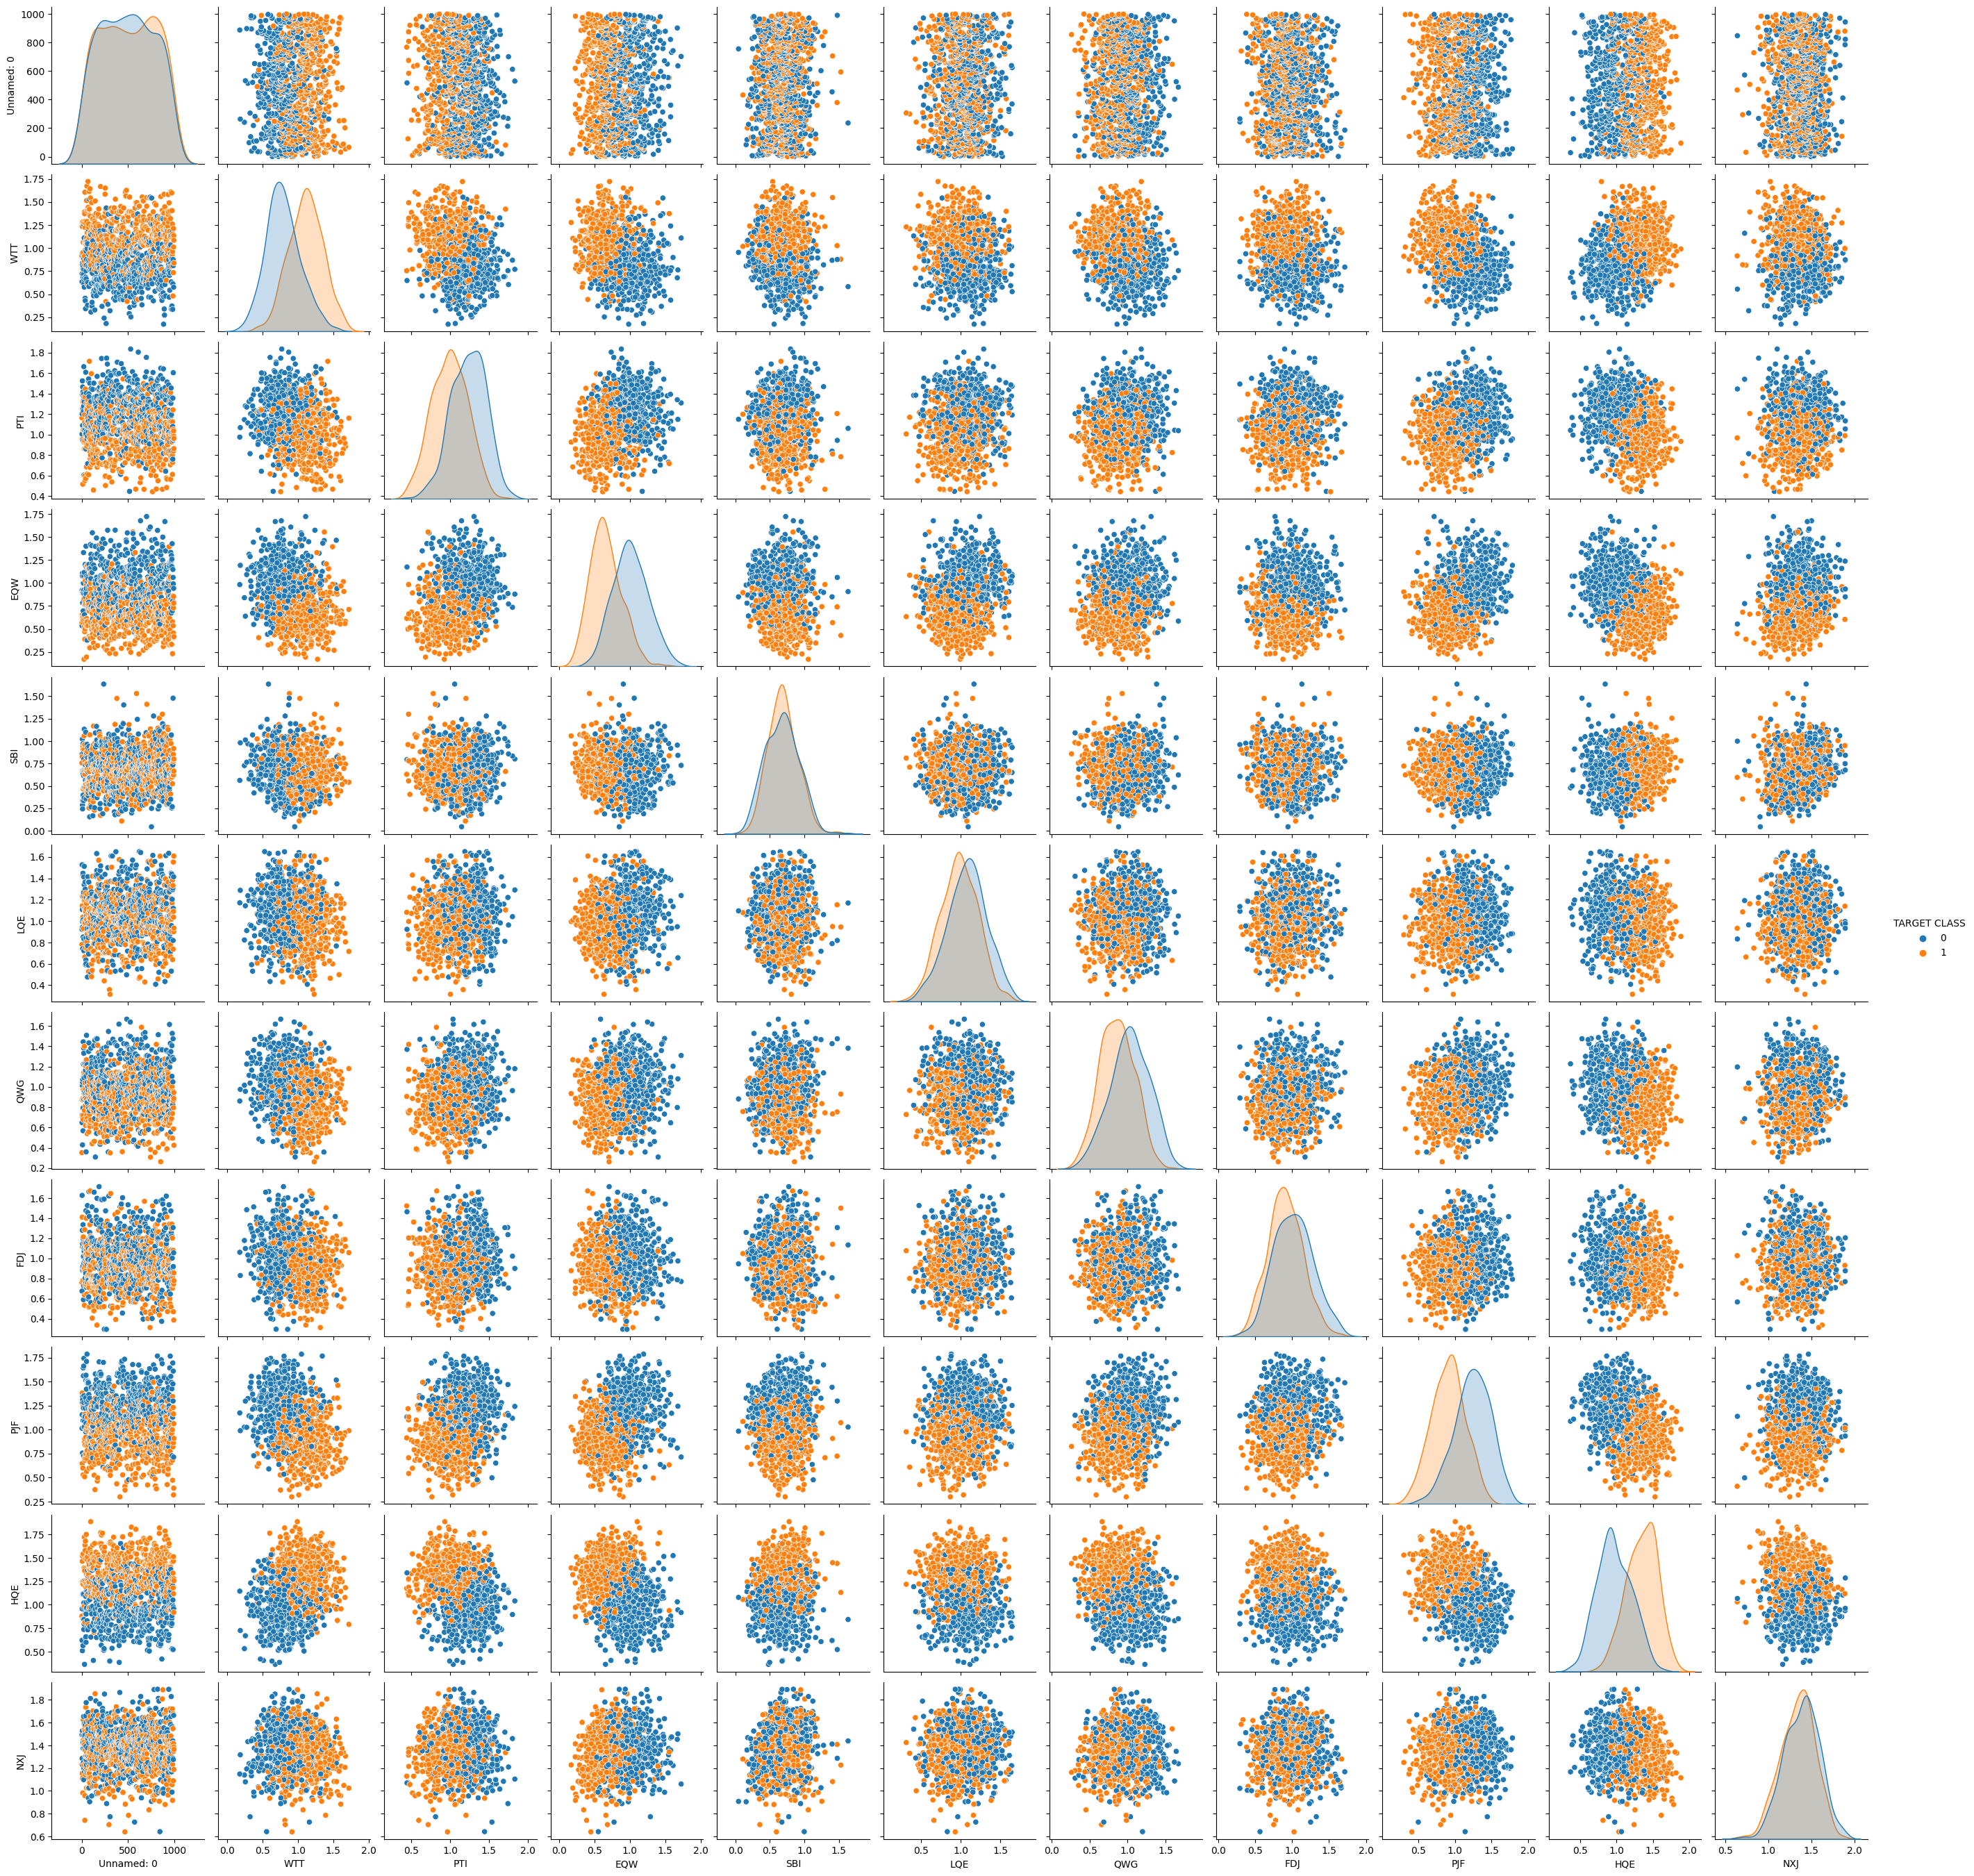

In [ ]:
#pair plot
import seaborn as sns
sns.pairplot(df,hue='TARGET CLASS')

In [ ]:
#TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split

In [ ]:
x_train ,x_test,y_train,y_test=train_test_split(scaled_features,df['TARGET CLASS'],test_size=0.30)

In [ ]:
#using kNN if k=1
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
pred=knn.predict(x_test)

In [ ]:
 #prediction and evaluations
 from sklearn.metrics import classification_report,confusion_matrix
 from sklearn.model_selection import cross_val_score

In [ ]:
print(confusion_matrix(y_test,pred))

[[129  14]
 [ 17 140]]


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       143
           1       0.91      0.89      0.90       157

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [ ]:
#choosing a k value
accuracy_rate=[]
for i in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=i)
  score=cross_val_score(knn,df_feat,df['TARGET CLASS'],cv=10)
  accuracy_rate.append(score.mean())

In [ ]:
error_rate=[]
for i in range (1,40):
  knn=KNeighborsClassifier(n_neighbors=i)
  score=cross_val_score(knn,df_feat,df['TARGET CLASS'],cv=10)
error_rate.append(1-score.mean())

In [ ]:
error_rate=[]
for i in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred_i=knn.predict(x_test)
  error_rate.append(np.mean(pred_i != y_test))
